concept to remove noise from the image 

In [1]:
from keras.datasets import mnist
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
(x_train, _),(x_test,_) = mnist.load_data()

In [4]:
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [5]:
X_train = x_train.astype('float32')/255
X_test = x_test.astype('float32')/255
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


CODING  uisng conv layer 

In [6]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [10]:
noise_factore = 0.5 
X_train_noisy = X_train+noise_factore*np.random.normal(0.0,1.0,X_train.shape)
X_test_noisy =X_test+noise_factore*np.random.normal(0.0,1.0,X_test.shape)

clipping

In [12]:
X_trin_noisy = np.clip(X_train_noisy,0.,1.)
X_test_noisy = np.clip(X_test_noisy,0.,1.)

In [13]:
print(X_train_noisy.shape)
print(X_test_noisy.shape)

(60000, 28, 28, 1)
(60000, 28, 28, 1)


plotting noisy dataset 

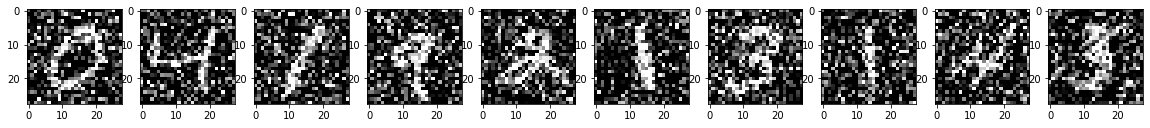

In [16]:
n=10
plt.figure(figsize=(20,2))
for i in range(1,n+1):
    sp = plt.subplot(1,n,i)
    plt.imshow(X_test_noisy[i].reshape(28,28))
    plt.gray()
plt.show()

MOdel (auto encoder)

In [18]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPool2D,UpSampling2D

In [26]:
input_img = Input(shape=(28,28,1))
x = Conv2D(32,(3,3),    #28,28,32
          activation='relu',
          padding='same')(input_img)

x = MaxPool2D((2,2))(x) #14,14,32

x = Conv2D(32,(3,3), #14,14,32
          activation='relu',
          padding='same')(x)
encoded = MaxPool2D((2,2))(x) #7,7,32

# now increase the size of the image 

x = Conv2D(32,(3,3), #7,7,32
          activation='relu',
          padding='same')(encoded)
x = UpSampling2D((2,2))(x)  #14,14,32

x = Conv2D(32,(3,3),        #14,14,32
          activation='relu',
          padding='same')(x)
x = UpSampling2D((2,2))(x)   #28,28,32

decoded = Conv2D(1,(3,3),     
                padding='same',
                activation='sigmoid')(x)

autoencoder = Model(input_img, decoded)

autoencoder.compile(optimizer='adadelta',
                   loss='binary_crossentropy')



fitting 

In [25]:
autoencoder.fit(X_train_noisy,X_train,
               validation_data=(X_test_noisy,X_test),
               epochs=2,
               batch_size=128,
               shuffle=True)

ValueError: Input arrays should have the same number of samples as target arrays. Found 60000 input samples and 10000 target samples.